In [1]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import rc, rcParams
from matplotlib import animation
from matplotlib.pyplot import cm
plt.rcParams['text.usetex'] = True

In [2]:
from Mu3e import fastmc as fm

In [3]:
def XY_longitudinal_geometry(ax):
    ax.spines[["left", "bottom"]].set_position("center")
    ax.spines[["left", "bottom"]].set_edgecolor(ax_colors)
    ax.spines[["left", "bottom"]].set_zorder(-1)
    ax.spines[["top", "right"]].set_visible(False)
    R = 105
    ax.set_ylim(-R, R)
    ax.set_xlim(-R, R)
    ax.tick_params(axis="x", colors=ax_colors, direction="inout", length=3, zorder=-1)
    ax.tick_params(axis="y", colors=ax_colors, direction="inout", length=3, zorder=-1)

    ax.scatter(
        0,
        ax.get_ylim()[1],
        marker=10,
        color=ax_colors,
        linewidth=0.0,
        clip_on=False,
        zorder=-1,
    )
    ax.scatter(
        ax.get_xlim()[1],
        0,
        marker=9,
        color=ax_colors,
        linewidth=0.0,
        clip_on=False,
        zorder=-1,
    )

    ax.text(
        1.02,
        0.53,
        r"$\mathrm{x/mm}$",
        fontsize=10,
        color=ax_colors,
        transform=ax.transAxes,
        ha="left",
        va="bottom",
        zorder=-1,
    )
    ax.text(
        0.53,
        1.02,
        r"$\mathrm{y/mm}$",
        fontsize=10,
        color=ax_colors,
        transform=ax.transAxes,
        ha="left",
        va="bottom",
        zorder=-1,
    )

In [4]:
def draw_layer(ax, apothem, vertices, pos=np.array([0, 0]), **kwargs):
    ax.add_patch(
        patches.RegularPolygon(
            pos, vertices, radius=get_radius_from_apothem(apothem, vertices), **kwargs
        )
    )
    kwargs.update({"lw": 0.25})
    ax.add_patch(
        patches.RegularPolygon(
            pos,
            vertices,
            radius=get_radius_from_apothem(apothem, vertices) + 1.5,
            **kwargs,
        )
    )

In [5]:
fsize = 12
fsize_annotate = 10

std_figsize = (1.2 * 3.7, 1.6 * 2.3617)
std_axes_form = [0.16, 0.15, 0.81, 0.76]

electron_color = (0.85, 0.39, 0.14)
positron_color = (0.16, 0.37, 0.65)
ax_colors = "#CFCFCF"
text_color = "grey"

particle_name = {"e+": r"e^+", "e-": r"e^-", "nu": r"\nu"}

In [6]:
def std_fig(ax_form=std_axes_form, figsize=std_figsize, rasterized=False):
    rcparams = {
        "axes.labelsize": fsize,
        "xtick.labelsize": fsize,
        "ytick.labelsize": fsize,
        "figure.figsize": std_figsize,
        "legend.frameon": False,
        "legend.loc": "best",
    }
    plt.rcParams["text.latex.preamble"] = r"\usepackage{amsmath}\usepackage{amssymb}"
    rc("font", **{"family": "serif", "serif": ["Computer Modern"]})
    rc("text", usetex=True)
    rcParams.update(rcparams)
    mpl.rcParams["hatch.linewidth"] = 0.3
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes(ax_form, rasterized=rasterized)
    ax.patch.set_alpha(0.0)

    return fig, ax

In [7]:
def get_radius_from_apothem(a, vertices):
    return a / np.cos(np.pi / vertices)

NameError: name 'draw_track' is not defined

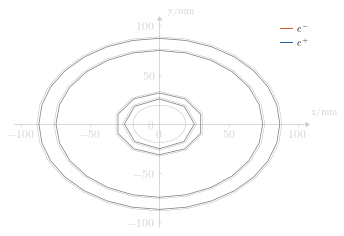

In [8]:
scale_factor = 4.5 / 4
path=None,
draw_momentum=False,
density=False,
animate=False,
frames=100

fig, ax = std_fig(figsize=(std_figsize[0] * scale_factor, std_figsize[1]))
ax.add_patch(
    patches.Circle(
        (0, 0), fm.target_R, fill=False, color="silver", lw=0.5, zorder=1
    )
)

det_kwargs = {"lw": 0.75, "color": "grey", "fill": False, "zorder": 1}
layers_R = [fm.layer1_R, fm.layer2_R, fm.layer3_R, fm.layer4_R]
layers_vert = [8, 10, 24, 28]

for R, vert in zip(layers_R, layers_vert):
    draw_layer(ax, R, vert, **det_kwargs)

#if density:
    #draw_decay_density(fig, ax, decay)

ax.plot([], [], label=r"$e^-$", color=electron_color, lw=1, ls="-")
ax.plot([], [], label=r"$e^+$", color=positron_color, lw=1, ls="-")
ax.legend(
    frameon=False, fontsize=10, loc=(0.9, 0.85), handlelength=1.2, handletextpad=0.5
)
XY_longitudinal_geometry(ax)
draw_track(ax, p, name, TIME=time / frames, draw_momentum=draw_momentum)

## Central barrell
- Double cone target is 100 mm wide with a 19 mm radius
- The two inner layers of the central barrell are 124.7 mm in length. The first layer has an minimum radius of 23.3 mm and the second layer has a minimum radius of 29.8 mm  
- the two outer layers are 351.9 mm and 372.6 mm in length, respectively. The first of the outer layers has a minimum radius of 73.9 mm and while the outermost layer has a minimum radius of 86.3 mm

## Recurler detectors
- The recurler detectors on either side of the central barrell are exact replicas of the outer layers on the central barrell.

In [ ]:
fig, ax = std_fig(figsize=(std_figsize[0] * scale_factor, std_figsize[1]))

# Inner layer 1
ax.plot([-62.35, 62.35], [23.3, 23.3], 'w-', lw=2)
ax.plot([-62.35, 62.35], [-23.3, -23.3], 'w-', lw=2)
# Inner layer 2
ax.plot([-62.35, 62.35], [29.8, 29.8], 'w-', lw=2)
ax.plot([-62.35, 62.35], [-29.8, -29.8], 'w-', lw=2)
# Outer layer 1
ax.plot([-175.95, 175.95], [73.9, 73.9], 'w-', lw=2)
ax.plot([-175.95, 175.95], [-73.9,-73.9], 'w-', lw=2)
# Outer layer 2
ax.plot([-186.3, 186.3], [86.3, 86.3], 'w-', lw=2)
ax.plot([-186.3, 186.3], [-86.3,-86.3], 'w-', lw=2)

target_coordinates = [(0, 19), (50, 0), (0, -19), (-50, 0)]


ax.add_patch(
    plt.Polygon(target_coordinates, color ='white',
                alpha = 0.5)
    )

ax.add_patch(
    patches.Circle(
        (0, 0), fm.target_R, fill=False, color="silver", lw=0.5, zorder=1
    )
)

det_kwargs = {"lw": 0.75, "color": "grey", "fill": False, "zorder": 1}
layers_R = [fm.layer1_R, fm.layer2_R, fm.layer3_R, fm.layer4_R]
layers_vert = [8, 10, 24, 28]

for R, vert in zip(layers_R, layers_vert):
    draw_layer(ax, R, vert, **det_kwargs)

#if density:
    #draw_decay_density(fig, ax, decay)

ax.plot([], [], label=r"$e^-$", color=electron_color, lw=1, ls="-")
ax.plot([], [], label=r"$e^+$", color=positron_color, lw=1, ls="-")
ax.legend(
    frameon=False, fontsize=10, loc=(0.9, 0.85), handlelength=1.2, handletextpad=0.5
)
XY_longitudinal_geometry(ax)

In [ ]:
fig, ax = plt.subplots(1,1,figsize = (10,8))

# Inner layer 1
ax.plot([-62.35, 62.35], [23.3, 23.3], 'b-', lw=2)
ax.plot([-62.35, 62.35], [-23.3, -23.3], 'b-', lw=2)
# Inner layer 2
ax.plot([-62.35, 62.35], [29.8, 29.8], 'b-', lw=2)
ax.plot([-62.35, 62.35], [-29.8, -29.8], 'b-', lw=2)
# Outer layer 1
ax.plot([-175.95, 175.95], [73.9, 73.9], 'b-', lw=2)
ax.plot([-175.95, 175.95], [-73.9,-73.9], 'b-', lw=2)
# Outer layer 2
ax.plot([-186.3, 186.3], [86.3, 86.3], 'b-', lw=2)
ax.plot([-186.3, 186.3], [-86.3,-86.3], 'b-', lw=2)

target_coordinates = [(0, 19), (50, 0), (0, -19), (-50, 0)]


ax.add_patch(
    plt.Polygon(target_coordinates, color ='black',
                alpha = 0.3)
    )

## Event generation

In [ ]:
# Tree level muon decay
M_MU = 0.10566 # GeV 
M_E = 0.000511 # GeV
Gf = 1.16e-5 #GeV^-2
I = lambda x: 1 - 8*x - 12* x**2 * np.log(x) + 8*x**3 - x**4
Gamma_mu = ((Gf**2 * M_MU**5) / (192 * np.pi**3)) * I((M_E / M_MU)**2)
print('Total decay width: ', Gamma_mu, 'GeV')

# MadGraph returns (1e4 events):
# Gamma_mu1e = 3.009e-19 +/- 4.33e-22
BR_mu1e = 3.009e-19 / Gamma_mu

# Gamma_mu3e = 1.031e-23 +/- 2.5e-24
BR_mu3e = 1.031e-23 / Gamma_mu

# Gamma_mu5e = 1.32992e-28 +/- 3.54e-31
BR_mu5e = 1.32992e-28 / Gamma_mu

print('BR(mu1e) ~', BR_mu1e)
print('BR(mu3e) ~', BR_mu3e)
print('BR(mu5e) ~', BR_mu5e)

# Probability of decay below detector time resolution
delta_t = 2.5 * 10e-10
P = Gamma_mu * np.exp(-Gamma_mu * delta_t)
print(P**3)

In [ ]:
from phasespace import GenParticle

# Import the amplitudes generated by MadGraph
from mu1e.SubProcesses.P1_mup_epvevmx import matrix2py as M_mu1e
from mu3e.SubProcesses.P1_mup_epemepvevmx import matrix2py as M_mu3e
from mu5e.SubProcesses.P1_mup_epemepemepvevmx_no_zh import matrix2py as M_mu5e

# Initialize amplitude models
M_mu1e.initialisemodel('./mu1e/Cards/param_card.dat')
M_mu3e.initialisemodel('./mu3e/Cards/param_card.dat')
M_mu5e.initialisemodel('./mu5e/Cards/param_card.dat')

In [ ]:
class Process:
    """
    Class to store the events generated by `phasespace`
    """
    
    def __init__(self, particles, weights, wmax=None, amp=None, branching=1.0):
        """
        Initialize the class and put format the momenta correctly
        """

        # output arrays from phasespace's generate(...)
        self.particles = particles
        self.weights = np.array(weights)
        self.wmax = np.array(wmax)

        self.branching = branching

        # amplitude module (already model initialised) from MG@5
        self.amp = amp
        self.alphaS = 0.12 # alpha strong -- not relevant for us.
        self.nhel = 0 # summ over all helicites -- TODO not sure how to use it in any other way...

        self.n_events = len(self.weights)

        # list of daughter particles
        self.daughter_names = list(self.particles.keys())

        # 4-momentum of the parent particle
        # self.p_parent = np.zeros_like(self.particles[self.daughter_names[0]])
        self.p_parent = np.sum([self.particles[k] for k in self.daughter_names], axis=0)
        
        self.put_energy_first()
        
        self.P_grid = self.build_P_grid()        
    
   
    def put_energy_first(self):
        # We need to rearrange the arrays so the first enetry is energy, and not px:
        # `phasespace` indices: 0 -> px, 1 -> py, 2 -> pz, 3 -> E
        # `MadGraph` and `DarkNews` indices: 0 -> E, 1 -> px, 2 -> py, 3 -> pz
        # when rearranging, also convert from TensorFlow object to numpy array
        for k in self.daughter_names:
            self.particles[k] = np.array(self.particles[k])[:,[3,0,1,2]]
        self.p_parent = self.p_parent[:,[3,0,1,2]]

    def build_P_grid(self):
        # dim 0: event number
        # dim 1: lorentz index
        # dim 2: particle number
        
        # Ordering --> Parent + daughters(following MadGraph convention)
        return np.transpose([self.p_parent] + [self.particles[k] for k in self.daughter_names], axes=(1,2,0) )
    
    def amp_in_P(self,P):
        if self.amp:
            return self.amp.get_value(P, self.alphaS, self.nhel)
    
    def amp_in_Pgrid(self):
        if self.amp:
            # loops over events and evaluates the amplitude given the list of momenta 
            self.w_amp = np.array([self.amp.get_value(self.P_grid[i], self.alphaS, self.nhel) for i in range(self.n_events)])
            self.w_final = self.w_amp * self.weights * self.branching / np.sum(self.w_amp * self.weights)

In [ ]:
# Defining particles involved 
M_MU = 0.10566 # GeV 
M_E = 0.000511 # GeV
MPARENT = M_MU

numubar = GenParticle('nu_mu_bar', 0.0)
nue = GenParticle('nu_e', 0.0)

positron_0 = GenParticle('e+_0', M_E)

electron_1 = GenParticle('e-_1', M_E)
positron_1 = GenParticle('e+_1', M_E)

electron_2 = GenParticle('e-_2', M_E)
positron_2 = GenParticle('e+_2', M_E)

# µ -> ν_mu_bar ν_e e+
# !! Watch out for the ordering of the particles (following diagrams in MadGraph)
parent_muon_3body = GenParticle('mu+', MPARENT).set_children(positron_0, nue, numubar)

# µ -> ν_mu_bar ν_e e+ e+ e-
# !! Watch out for the ordering of the particles (following diagrams in MadGraph)
parent_muon_5body = GenParticle('mu+', MPARENT).set_children(positron_0, electron_1, positron_1, nue, numubar)

# µ -> ν_mu_bar ν_e e+ e+ e- e+ e-
# !! Watch out for the ordering of the particles (following diagrams in MadGraph)
parent_muon_7body = GenParticle('mu+', MPARENT).set_children(positron_0, electron_1, positron_1, electron_2, positron_2, nue, numubar)

# Generate the 4 momenta and weights
NEVENTS = 1e2

_weights, _wmax,  _particles = parent_muon_3body.generate(n_events=NEVENTS, normalize_weights=False)
m_mu1e = Process(_particles, _weights, wmax=_wmax, amp=M_mu1e, branching = 1)

# Generate the 4 momenta and weights
_weights, _wmax,  _particles = parent_muon_5body.generate(n_events=NEVENTS, normalize_weights=False)
m_mu3e = Process(_particles, _weights, wmax=_wmax, amp=M_mu3e, branching = BR_mu3e)

# Generate the 4 momenta and weights
_weights, _wmax,  _particles = parent_muon_7body.generate(n_events=NEVENTS, normalize_weights=False)
m_mu5e = Process(_particles, _weights, wmax=_wmax, amp=M_mu5e, branching = BR_mu5e)

In [ ]:
m_mu1e.amp_in_Pgrid()

In [ ]:
m_mu3e.amp_in_Pgrid()

In [ ]:
m_mu5e.amp_in_Pgrid()

In [ ]:
# Print particle event
print(m_mu5e.particles['e+_0'][0])
print(m_mu5e.particles['e-_1'][0])
print(m_mu5e.particles['e+_1'][0])
print(m_mu5e.particles['e-_2'][0])
print(m_mu5e.particles['e+_2'][0])
print(m_mu5e.particles['nu_mu_bar'][0])
print(m_mu5e.particles['nu_e'][0])

In [ ]:
def helix(p, q, B = 1.0):
    """
    Helical motion of a charged particle in the longitudinal frame of Mu3e with B-field along z-axis.
    
    y ^
      |   /
      |  /
      | /
      |/ ) theta_B
      -------------> z
    """
    print(p)
    # Rescale to MeV
    p = p * 1e3
    c = 3e11 # mm / s
    E = p[0]
    px = p[1]
    py = p[2]
    pz = p[3]
    
    pT = np.sqrt(px**2 + py**2)
    
    # Velocity components
    beta_z = (pz / E)
    print('beta z:', beta_z)
    beta_y = (py / E)
    
    beta_T = (pT / E)
    
    # Angle between charged particle (projected) momentum and B-field
    theta_B = np.arctan2(py, pz)
    print(theta_B)
    
    # Relevant velocity compenents
    v_parallel = beta_z * c
    v_perp = beta_T * c
    print('v parallel: ', v_parallel)
    
    # Period of oscillation
    T = (pT / (0.28)) / (v_perp  * B) # s
    print(T)
    
    # Radius 
    r = (pT / 0.28) / B # mm
    print(r)
    
    # Angle between transverse axes
    phi = np.arctan2(pz, px)
    
    # Time of simulation, 2 * pi represents one oscillation
    t_max = 2 * np.pi
    n = 1000
    # Helical trajectory
    t = np.linspace(0, t_max, n)
    z =  v_parallel * T * t
    print(z)
    x =  q * r * np.cos(t) -  q * r
    y =  q * r * np.sin(t)
    
    # Rotate the trajectory about the x-axis by theta_B
    zhat = z * np.cos(theta_B) - y * np.sin(theta_B)
    yhat = z * np.sin(theta_B) + y * np.cos(theta_B)
    # Rotate the trajectory about the y-axis by phi
    zhat = z * np.cos(phi) + x * np.sin(phi)
    
    return zhat, yhat

In [ ]:
def helix(p, q, B = 1.0):
    """
    Helical motion of a charged particle in the longitudinal frame of Mu3e with B-field along z-axis.
    
    y ^
      |   /   B
      |  /   ---> 
      | /
      |/ ) theta
      -------------> z
    """
    # Rescale to MeV
    p  = p * 1e3
    c  = 3e11 # mm / s
    E  = p[0] # MeV 
    px = p[1] # MeV
    py = p[2] # MeV
    pz = p[3] # MeV
    
    pT = np.sqrt(px**2 + py**2)
    
    # Velocity components
    beta_z = (pz / E)
    beta_y = (py / E)
    beta_T = (pT / E)
    
    # Relevant velocity compenents
    v_parallel = beta_z * c # mm / s
    v_perp     = beta_T * c # mm / s
    
    # Period of oscillation
    T = (pT / (0.28)) / (v_perp  * B) # s
    
    # Time of simulation, 2 * pi represents one oscillation
    t_max = 2 * np.pi
    n = 1000
    t = np.linspace(0, t_max, n)
    # Helical trajectory
    z =  v_parallel * T * t
    x =  (q / 0.28) * (py - py * np.cos(q * t) + px * np.sin(q * t))
    y =  (q / 0.28) * (- px + px * np.cos(q * t) + py * np.sin(q * t))
    
    # Incorporate arbitrary decay origin within the target
    
    return z, y

In [ ]:
z_e_plus_0, y_e_plus_0   = helix(m_mu5e.particles['e+_0'][1], q = 1)
z_e_plus_1, y_e_plus_1   = helix(m_mu5e.particles['e+_1'][2], q = 1)
z_e_plus_2, y_e_plus_2   = helix(m_mu5e.particles['e+_2'][2], q = 1)
z_e_minus_1, y_e_minus_1 = helix(m_mu5e.particles['e-_1'][2], q = -1)
z_e_minus_2, y_e_minus_2 = helix(m_mu5e.particles['e-_2'][2], q = -1)
#print(y,z)

fig, ax = plt.subplots(1,1,figsize = (14,6))

# Central detector
# Inner layer 1
ax.plot([-62.35, 62.35], [23.3, 23.3], '-', c = 'gray', lw=1.2, alpha = 0.7)
ax.plot([-62.35, 62.35], [-23.3, -23.3], '-', c = 'gray', lw=1.2, alpha = 0.7)
# Inner layer 2
ax.plot([-62.35, 62.35], [29.8, 29.8], '-', c = 'gray', lw=1.2, alpha = 0.7)
ax.plot([-62.35, 62.35], [-29.8, -29.8], '-', c = 'gray', lw=1.2, alpha = 0.7)
# Outer layer 1
ax.plot([-175.95, 175.95], [73.9, 73.9], '-', c = 'gray', lw=1.2, alpha = 0.7)
ax.plot([-175.95, 175.95], [-73.9,-73.9], '-', c = 'gray', lw=1.2, alpha = 0.7)
# Outer layer 2
ax.plot([-186.3, 186.3], [86.3, 86.3], '-', c = 'gray', lw=1.2, alpha = 0.7)
ax.plot([-186.3, 186.3], [-86.3,-86.3], '-', c = 'gray', lw=1.2, alpha = 0.7)

# Forward recurler
# Outer layer 1
ax.plot([175.95 + 10, 4*175.95 + 10], [73.9, 73.9], '-', c = 'gray', lw=1.2, alpha = 0.7)
ax.plot([175.95 + 10, 4*175.95 + 10], [-73.9,-73.9], '-', c = 'gray', lw=1.2, alpha = 0.7)
# Outer layer 2
ax.plot([186.3 + 10, 4*186.3 + 10], [86.3, 86.3], '-', c = 'gray', lw=1.2, alpha = 0.7)
ax.plot([186.3 + 10, 4*186.3 + 10], [-86.3,-86.3], '-', c = 'gray', lw=1.2, alpha = 0.7)

# Backward recurler
# Outer layer 1
ax.plot([-175.95 - 10, -4*175.95 - 10], [73.9, 73.9], '-', c = 'gray', lw=1.2, alpha = 0.7)
ax.plot([-175.95 - 10, -4*175.95 - 10], [-73.9,-73.9], '-', c = 'gray', lw=1.2, alpha = 0.7)
# Outer layer 2
ax.plot([-186.3 - 10, -4*186.3 - 10], [86.3, 86.3], '-', c = 'gray', lw=1.2, alpha = 0.7)
ax.plot([-186.3 - 10, -4*186.3 - 10], [-86.3,-86.3], '-', c = 'gray', lw=1.2, alpha = 0.7)

# Plot the event
ax.plot(z_e_plus_0,   y_e_plus_0, lw = 1.5, c = 'b')
ax.plot(z_e_plus_1,   y_e_plus_1, lw = 1.5, c = 'b')
ax.plot(z_e_plus_2,   y_e_plus_2, lw = 1.5, c = 'b')
ax.plot(z_e_minus_1, y_e_minus_1, lw = 1.5, c = 'orange')
ax.plot(z_e_minus_2, y_e_minus_2, lw = 1.5, c = 'orange')

ax.set_xlim(-800, 800)
ax.set_ylim(-150, 150)

ax.set_xlabel(r'$z/mm$')
ax.set_ylabel(r'$y/mm$')

target_coordinates = [(0, 19), (50, 0), (0, -19), (-50, 0)]


ax.add_patch(
    plt.Polygon(target_coordinates, color ='black',
                alpha = 0.2)
    )

In [ ]:
z_e_plus_0, y_e_plus_0   = helix(m_mu3e.particles['e+_0'][1], q = 1)
z_e_plus_1, y_e_plus_1   = helix(m_mu3e.particles['e+_1'][1], q = 1)
z_e_minus_1, y_e_minus_1 = helix(m_mu3e.particles['e-_1'][1], q = -1)
#print(y,z)

fig, ax = plt.subplots(1,1,figsize = (14,6))

# Central detector
# Inner layer 1
ax.plot([-62.35, 62.35], [23.3, 23.3], '-', c = 'gray', lw=1.2, alpha = 0.7)
ax.plot([-62.35, 62.35], [-23.3, -23.3], '-', c = 'gray', lw=1.2, alpha = 0.7)
# Inner layer 2
ax.plot([-62.35, 62.35], [29.8, 29.8], '-', c = 'gray', lw=1.2, alpha = 0.7)
ax.plot([-62.35, 62.35], [-29.8, -29.8], '-', c = 'gray', lw=1.2, alpha = 0.7)
# Outer layer 1
ax.plot([-175.95, 175.95], [73.9, 73.9], '-', c = 'gray', lw=1.2, alpha = 0.7)
ax.plot([-175.95, 175.95], [-73.9,-73.9], '-', c = 'gray', lw=1.2, alpha = 0.7)
# Outer layer 2
ax.plot([-186.3, 186.3], [86.3, 86.3], '-', c = 'gray', lw=1.2, alpha = 0.7)
ax.plot([-186.3, 186.3], [-86.3,-86.3], '-', c = 'gray', lw=1.2, alpha = 0.7)

# Forward recurler
# Outer layer 1
ax.plot([175.95 + 10, 4*175.95 + 10], [73.9, 73.9], '-', c = 'gray', lw=1.2, alpha = 0.7)
ax.plot([175.95 + 10, 4*175.95 + 10], [-73.9,-73.9], '-', c = 'gray', lw=1.2, alpha = 0.7)
# Outer layer 2
ax.plot([186.3 + 10, 4*186.3 + 10], [86.3, 86.3], '-', c = 'gray', lw=1.2, alpha = 0.7)
ax.plot([186.3 + 10, 4*186.3 + 10], [-86.3,-86.3], '-', c = 'gray', lw=1.2, alpha = 0.7)

# Backward recurler
# Outer layer 1
ax.plot([-175.95 - 10, -4*175.95 - 10], [73.9, 73.9], '-', c = 'gray', lw=1.2, alpha = 0.7)
ax.plot([-175.95 - 10, -4*175.95 - 10], [-73.9,-73.9], '-', c = 'gray', lw=1.2, alpha = 0.7)
# Outer layer 2
ax.plot([-186.3 - 10, -4*186.3 - 10], [86.3, 86.3], '-', c = 'gray', lw=1.2, alpha = 0.7)
ax.plot([-186.3 - 10, -4*186.3 - 10], [-86.3,-86.3], '-', c = 'gray', lw=1.2, alpha = 0.7)

# Plot the event
ax.plot(z_e_plus_0,   y_e_plus_0, lw = 1.5, c = 'b')
ax.plot(z_e_plus_1,   y_e_plus_1, lw = 1.5, c = 'b')
ax.plot(z_e_minus_1, y_e_minus_1, lw = 1.5, c = 'orange')

ax.set_xlim(-800, 800)
ax.set_ylim(-150, 150)

ax.set_xlabel(r'$z$')
ax.set_ylabel(r'$y$')

target_coordinates = [(0, 19), (50, 0), (0, -19), (-50, 0)]

ax.add_patch(
    plt.Polygon(target_coordinates, color ='black',
                alpha = 0.2)
    )

## Longitudinal view

In [ ]:
z_e_plus_0, y_e_plus_0   = helix(m_mu5e.particles['e+_0'][5], q = 1)
z_e_plus_1, y_e_plus_1   = helix(m_mu5e.particles['e+_1'][5], q = 1)
z_e_plus_2, y_e_plus_2   = helix(m_mu5e.particles['e+_2'][5], q = 1)
z_e_minus_1, y_e_minus_1 = helix(m_mu5e.particles['e-_1'][5], q = -1)
z_e_minus_2, y_e_minus_2 = helix(m_mu5e.particles['e-_2'][5], q = -1)

fig, ax = plt.subplots(1,1, figsize = (2 * 1.2 * 3.7, 1.6 * 2.3617))

# Central detector
# Inner layer 1
ax.plot([-62.35, 62.35], [23.3, 23.3], '-', c = 'gray', lw=1.0, alpha = 0.7)
ax.plot([-62.35, 62.35], [-23.3, -23.3], '-', c = 'gray', lw=1.0, alpha = 0.7)
ax.plot([-62.35, 62.35], [23.3+1.5, 23.3+1.5], '-', c = 'gray', lw=0.25, alpha = 0.7)
ax.plot([-62.35, 62.35], [-23.3-1.5, -23.3-1.5], '-', c = 'gray', lw=0.25, alpha = 0.7)
# Inner layer 2
ax.plot([-62.35, 62.35], [29.8, 29.8], '-', c = 'gray', lw=1.0, alpha = 0.7)
ax.plot([-62.35, 62.35], [-29.8, -29.8], '-', c = 'gray', lw=1.0, alpha = 0.7)
ax.plot([-62.35, 62.35], [29.8+1.5, 29.8+1.5], '-', c = 'gray', lw=0.25, alpha = 0.7)
ax.plot([-62.35, 62.35], [-29.8-1.5, -29.8-1.5], '-', c = 'gray', lw=0.25, alpha = 0.7)
# Outer layer 1
ax.plot([-175.95, 175.95], [73.9, 73.9], '-', c = 'gray', lw=1.0, alpha = 0.7)
ax.plot([-175.95, 175.95], [-73.9,-73.9], '-', c = 'gray', lw=1.0, alpha = 0.7)
# Outer layer 2
ax.plot([-186.3, 186.3], [86.3, 86.3], '-', c = 'gray', lw=1.0, alpha = 0.7)
ax.plot([-186.3, 186.3], [-86.3,-86.3], '-', c = 'gray', lw=1.0, alpha = 0.7)

# Forward recurler
# Outer layer 1
ax.plot([175.95 + 10, 4*175.95 + 10], [73.9, 73.9], '-', c = 'gray', lw=1.0, alpha = 0.7)
ax.plot([175.95 + 10, 4*175.95 + 10], [-73.9,-73.9], '-', c = 'gray', lw=1.0, alpha = 0.7)
# Outer layer 2
ax.plot([186.3 + 10, 4*186.3 + 10], [86.3, 86.3], '-', c = 'gray', lw=1.0, alpha = 0.7)
ax.plot([186.3 + 10, 4*186.3 + 10], [-86.3,-86.3], '-', c = 'gray', lw=1.0, alpha = 0.7)

# Backward recurler
# Outer layer 1
ax.plot([-175.95 - 10, -4*175.95 - 10], [73.9, 73.9], '-', c = 'gray', lw=1.0, alpha = 0.7)
ax.plot([-175.95 - 10, -4*175.95 - 10], [-73.9,-73.9], '-', c = 'gray', lw=1.0, alpha = 0.7)
# Outer layer 2
ax.plot([-186.3 - 10, -4*186.3 - 10], [86.3, 86.3], '-', c = 'gray', lw=1.0, alpha = 0.7)
ax.plot([-186.3 - 10, -4*186.3 - 10], [-86.3,-86.3], '-', c = 'gray', lw=1.0, alpha = 0.7)

# Plot the event
electron_color = (0.85, 0.39, 0.14)
positron_color = (0.16, 0.37, 0.65)
ax.plot(z_e_plus_0,   y_e_plus_0, lw = 1.0, c = positron_color)
ax.plot(z_e_plus_1,   y_e_plus_1, lw = 1.0, c = positron_color)
ax.plot(z_e_plus_2,   y_e_plus_2, lw = 1.0, c = positron_color)
ax.plot(z_e_minus_1, y_e_minus_1, lw = 1.0, c = electron_color)
ax.plot(z_e_minus_2, y_e_minus_2, lw = 1.0, c = electron_color)

ax.plot([], [], label=r"$e^-$", color=electron_color, lw=1, ls="-")
ax.plot([], [], label=r"$e^+$", color=positron_color, lw=1, ls="-")

ax.set_xlim(-800, 800)
ax.set_ylim(-150, 150)

# Styling
ax_colors = "#CFCFCF"
ax.spines[["left", "bottom"]].set_position("center")
ax.spines[["left", "bottom"]].set_edgecolor(ax_colors)
ax.spines[["left", "bottom"]].set_zorder(-1)
ax.spines[["top", "right"]].set_visible(False)

ax.set_xticks([-800, -600, -400, -200, 200, 400, 600, 800])
ax.set_yticks([-150, -100, -50, 50, 100, 150])

ax.set_xticklabels(
        [r'$-800$', "", r'$-400$', "", "", r'$400$', "", r'$800$'], fontsize=10, color=ax_colors, zorder=-1
    )
ax.set_yticklabels(
        [r'$-150$', "", r'$-50$', r'$50$', "", r'$150$'], fontsize=10, color=ax_colors, zorder=-1
    )
ax.tick_params(axis="x", colors=ax_colors, direction="inout", length=3, zorder=-1)
ax.tick_params(axis="y", colors=ax_colors, direction="inout", length=3, zorder=-1)

ax.scatter(
        0,
        ax.get_ylim()[1],
        marker=10,
        color=ax_colors,
        linewidth=0.0,
        clip_on=False,
        zorder=-1,
    )
ax.scatter(
        ax.get_xlim()[1],
        0,
        marker=9,
        color=ax_colors,
        linewidth=0.0,
        clip_on=False,
        zorder=-1,
    )

ax.text(
        1.02,
        0.53,
        r"$z\mathrm{/mm}$",
        fontsize=10,
        color=ax_colors,
        transform=ax.transAxes,
        ha="left",
        va="bottom",
        zorder=-1,
    )
ax.text(
        0.53,
        1.02,
        r"$y\mathrm{/mm}$",
        fontsize=10,
        color=ax_colors,
        transform=ax.transAxes,
        ha="left",
        va="bottom",
        zorder=-1,
    )


target_coordinates = [(0, 19), (50, 0), (0, -19), (-50, 0)]

ax.legend(frameon = False)


ax.add_patch(
    plt.Polygon(target_coordinates, color ='black',
                alpha = 0.2)
    )

fig.tight_layout()
fig.savefig(r'longitudinal_event_display.pdf', dpi = 300, pad_inches = .1, bbox_inches = 'tight')

## Transverse view

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (12,12))

target_coordinates = [(0, 19), (50, 0), (0, -19), (-50, 0)]

ax.add_patch(
    plt.Polygon(target_coordinates, color ='white',
                alpha = 0.5)
    )

ax.add_patch(
    patches.Circle(
        (0, 0), fm.target_R, fill=False, color="silver", lw=0.5, zorder=1
    )
)

det_kwargs = {"lw": 0.75, "color": "grey", "fill": False, "zorder": 1}
layers_R = [fm.layer1_R, fm.layer2_R, fm.layer3_R, fm.layer4_R]
layers_vert = [8, 10, 24, 28]

for R, vert in zip(layers_R, layers_vert):
    draw_layer(ax, R, vert, **det_kwargs)
    
ax.set_xlim(-100, 100)
ax.set_ylim(-100, 100)

In [ ]:
def circle(p, q, B = 1.0):
    """
    Circular motion of a charged particle in the transverse frame of Mu3e with B-field along z-axis (into page).
    
    y ^
      |   /   B
      |  /   (X)
      | /
      |/ ) phi
      -------------> x
    """
    # Rescale to MeV
    print(p)
    p = p * 1e3
    c = 3e11 # mm / s
    E = p[0]
    px = p[1]
    py = p[2]
    pT = np.sqrt(px**2 + py**2)
    
    # Velocity components
    beta_T = (pT / E)
    
    # Angle between transverse axes
    phi = np.arctan2(py, px)
    
    # Relevant velocity compenents
    v_perp = beta_T * c 
    
    # Period of oscillation
    T = (pT / (0.28)) / (v_perp  * B) # s
    print(T)
    
    # Radius 
    r = (pT / 0.28) / B # mm
    print(r)
    
    t_max = 2 * np.pi - np.pi
    n = 1000
    # Circular trajectory
    t = np.linspace(0, t_max, n)
    # Minus sign on x-coord is due to right-handed coord-system
    x =  q * r * np.cos(t) - q * r
    y =  q * r * np.sin(t)
    
    # Shift to start at the center
    
    # Rotate the trajectory by theta_B
    xhat =   -x * np.cos((np.pi / 2) - phi) + y * np.sin((np.pi / 2) - phi)
    yhat =   -x * np.sin((np.pi / 2) - phi) - y * np.cos((np.pi / 2) - phi)
    
    return xhat, yhat

In [ ]:
def circle(p, q, B = 1.0):
    """
    Circular motion of a charged particle in the transverse frame of Mu3e with B-field along z-axis (into page).
    
    y ^
      |   /   B
      |  /   (X)
      | /
      |/ ) phi
      -------------> x
    """
    # Rescale to MeV
    p = p * 1e3
    c = 3e11 # mm / s
    E = p[0]
    px = p[1]
    py = p[2]
    pz = p[3]
    pT = np.sqrt(px**2 + py**2)
    
    # Velocity components
    beta_T = (pT / E)
    beta_z = (pz / E)
    
    # Relevant velocity compenents
    v_perp = beta_T * c 
    v_parallel = beta_z * c
    
    # Period of oscillation
    T = (pT / (0.28)) / (v_perp  * B) # s
    
    # Time of simulation, 2 * pi represents one oscillation
    t_max = 2 * np.pi - np.pi
    n = 1000
    t = np.linspace(0, t_max, n)
    # Circular trajectory
    z =  v_parallel * T * t
    x =  (q / 0.28) * (py - py * np.cos(q * t) + px * np.sin(q * t))
    y =  (q / 0.28) * (- px + px * np.cos(q * t) + py * np.sin(q * t))
    
    return x, y

In [ ]:
x_e_plus_0, y_e_plus_0   = circle(m_mu5e.particles['e+_0'][5], q = 1)
x_e_plus_1, y_e_plus_1   = circle(m_mu5e.particles['e+_1'][5], q = 1)
x_e_plus_2, y_e_plus_2   = circle(m_mu5e.particles['e+_2'][5], q = 1)
x_e_minus_1, y_e_minus_1 = circle(m_mu5e.particles['e-_1'][5], q = -1)
x_e_minus_2, y_e_minus_2 = circle(m_mu5e.particles['e-_2'][5], q = -1)

fig, ax = plt.subplots(1,1, figsize = (12,12))

target_coordinates = [(0, 19), (50, 0), (0, -19), (-50, 0)]

ax.add_patch(
    plt.Polygon(target_coordinates, color ='white',
                alpha = 0.5)
    )

ax.add_patch(
    patches.Circle(
        (0, 0), fm.target_R, fill=False, color="silver", lw=0.5, zorder=1
    )
)

det_kwargs = {"lw": 0.75, "color": "grey", "fill": False, "zorder": 1}
layers_R = [fm.layer1_R, fm.layer2_R, fm.layer3_R, fm.layer4_R]
layers_vert = [8, 10, 24, 28]

for R, vert in zip(layers_R, layers_vert):
    draw_layer(ax, R, vert, **det_kwargs)
    
ax.set_xlim(-100, 100)
ax.set_ylim(-100, 100)

# Plot the event
electron_color = (0.85, 0.39, 0.14)
positron_color = (0.16, 0.37, 0.65)
ax.plot(x_e_plus_0,   y_e_plus_0, lw = 1.0, c = positron_color)
ax.plot(x_e_plus_1,   y_e_plus_1, lw = 1.0, c = positron_color)
ax.plot(x_e_plus_2,   y_e_plus_2, lw = 1.0, c = positron_color)
ax.plot(x_e_minus_1, y_e_minus_1, lw = 1.0, c = electron_color)
ax.plot(x_e_minus_2, y_e_minus_2, lw = 1.0, c = electron_color)

ax.plot([], [], label=r"$e^-$", color=electron_color, lw=1, ls="-")
ax.plot([], [], label=r"$e^+$", color=positron_color, lw=1, ls="-")

ax.legend(frameon = False)

In [ ]:
x_e_plus_0, y_e_plus_0   = circle(m_mu5e.particles['e+_0'][5], q = 1)
x_e_plus_1, y_e_plus_1   = circle(m_mu5e.particles['e+_1'][5], q = 1)
x_e_plus_2, y_e_plus_2   = circle(m_mu5e.particles['e+_2'][5], q = 1)
x_e_minus_1, y_e_minus_1 = circle(m_mu5e.particles['e-_1'][5], q = -1)
x_e_minus_2, y_e_minus_2 = circle(m_mu5e.particles['e-_2'][5], q = -1)

fig, ax = plt.subplots(1,1, figsize = (1.2 * 3.7, 1.6 * 2.3617))

target_coordinates = [(0, 19), (50, 0), (0, -19), (-50, 0)]

ax.add_patch(
    plt.Polygon(target_coordinates, color ='white',
                alpha = 0.5)
    )

ax.add_patch(
    patches.Circle(
        (0, 0), fm.target_R, fill=False, color="silver", lw=0.5, zorder=1
    )
)

det_kwargs = {"lw": 0.75, "color": "grey", "fill": False, "zorder": 1}
layers_R = [fm.layer1_R, fm.layer2_R, fm.layer3_R, fm.layer4_R]
layers_vert = [8, 10, 24, 28]

for R, vert in zip(layers_R, layers_vert):
    draw_layer(ax, R, vert, **det_kwargs)
    
ax.set_xlim(-100, 100)
ax.set_ylim(-100, 100)

# Plot the event
electron_color = (0.85, 0.39, 0.14)
positron_color = (0.16, 0.37, 0.65)
ax.plot(x_e_plus_0,   y_e_plus_0, lw = 1.0, c = positron_color)
ax.plot(x_e_plus_1,   y_e_plus_1, lw = 1.0, c = positron_color)
ax.plot(x_e_plus_2,   y_e_plus_2, lw = 1.0, c = positron_color)
ax.plot(x_e_minus_1, y_e_minus_1, lw = 1.0, c = electron_color)
ax.plot(x_e_minus_2, y_e_minus_2, lw = 1.0, c = electron_color)

ax.plot([], [], label=r"$e^-$", color=electron_color, lw=1, ls="-")
ax.plot([], [], label=r"$e^+$", color=positron_color, lw=1, ls="-")

ax.legend(frameon = False)

# Styling
ax_colors = "#CFCFCF"
ax.spines[["left", "bottom"]].set_position("center")
ax.spines[["left", "bottom"]].set_edgecolor(ax_colors)
ax.spines[["left", "bottom"]].set_zorder(-1)
ax.spines[["top", "right"]].set_visible(False)

R = 105
ax.set_ylim(-R, R)
ax.set_xlim(-R, R)
ax.set_xticks([-100, -75, -50, -25, 25, 50, 75, 100])
ax.set_yticks([-100, -75, -50, -25, 25, 50, 75, 100])
ax.set_xticklabels(
    [r'$-100$', "", r'$-50$', "", "", r'$50$', "", r'$100$'], fontsize=10, color=ax_colors, zorder=-1
)
ax.set_yticklabels(
    [r'$-100$', "", r'$-50$', "", "", r'$50$', "", r'$100$'], fontsize=10, color=ax_colors, zorder=-1
)
ax.tick_params(axis="x", colors=ax_colors, direction="inout", length=3, zorder=-1)
ax.tick_params(axis="y", colors=ax_colors, direction="inout", length=3, zorder=-1)


ax.scatter(
        0,
        ax.get_ylim()[1],
        marker=10,
        color=ax_colors,
        linewidth=0.0,
        clip_on=False,
        zorder=-1,
    )
ax.scatter(
        ax.get_xlim()[1],
        0,
        marker=9,
        color=ax_colors,
        linewidth=0.0,
        clip_on=False,
        zorder=-1,
    )

ax.text(
        1.02,
        0.53,
        r"$z\mathrm{/mm}$",
        fontsize=10,
        color=ax_colors,
        transform=ax.transAxes,
        ha="left",
        va="bottom",
        zorder=-1,
    )
ax.text(
        0.53,
        1.02,
        r"$y\mathrm{/mm}$",
        fontsize=10,
        color=ax_colors,
        transform=ax.transAxes,
        ha="left",
        va="bottom",
        zorder=-1,
    )

fig.tight_layout()
fig.savefig(r'transevrse_event_display.pdf', dpi = 300, pad_inches = .1, bbox_inches = 'tight')

## Full event display

In [ ]:
event = 3

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20, 20), gridspec_kw={'width_ratios': [1, 2.8]})

x_e_plus_0, y_e_plus_0   = circle(m_mu5e.particles['e+_0'][event], q = 1)
x_e_plus_1, y_e_plus_1   = circle(m_mu5e.particles['e+_1'][event], q = 1)
x_e_plus_2, y_e_plus_2   = circle(m_mu5e.particles['e+_2'][event], q = 1)
x_e_minus_1, y_e_minus_1 = circle(m_mu5e.particles['e-_1'][event], q = -1)
x_e_minus_2, y_e_minus_2 = circle(m_mu5e.particles['e-_2'][event], q = -1)

target_coordinates = [(0, 19), (50, 0), (0, -19), (-50, 0)]

ax1.add_patch(
    plt.Polygon(target_coordinates, color ='white',
                alpha = 0.5)
    )

ax1.add_patch(
    patches.Circle(
        (0, 0), fm.target_R, fill=False, color="silver", lw=0.5, zorder=1
    )
)

det_kwargs = {"lw": 0.75, "color": "grey", "fill": False, "zorder": 1}
layers_R = [fm.layer1_R, fm.layer2_R, fm.layer3_R, fm.layer4_R]
layers_vert = [8, 10, 24, 28]

for R, vert in zip(layers_R, layers_vert):
    draw_layer(ax1, R, vert, **det_kwargs)
    
ax1.set_xlim(-100, 100)
ax1.set_ylim(-100, 100)

# Plot the event
electron_color = (0.85, 0.39, 0.14)
positron_color = (0.16, 0.37, 0.65)
ax1.plot(x_e_plus_0,   y_e_plus_0, lw = 1.0, c = positron_color)
ax1.plot(x_e_plus_1,   y_e_plus_1, lw = 1.0, c = positron_color)
ax1.plot(x_e_plus_2,   y_e_plus_2, lw = 1.0, c = positron_color)
ax1.plot(x_e_minus_1, y_e_minus_1, lw = 1.0, c = electron_color)
ax1.plot(x_e_minus_2, y_e_minus_2, lw = 1.0, c = electron_color)

ax1.plot([], [], label=r"$e^-$", color=electron_color, lw=1, ls="-")
ax1.plot([], [], label=r"$e^+$", color=positron_color, lw=1, ls="-")

ax1.legend(frameon = False, fontsize = 'large')

# Styling
ax_colors = "#CFCFCF"
ax1.spines[["left", "bottom"]].set_position("center")
ax1.spines[["left", "bottom"]].set_edgecolor(ax_colors)
ax1.spines[["left", "bottom"]].set_zorder(-1)
ax1.spines[["top", "right"]].set_visible(False)

R = 100
ax1.set_ylim(-R, R)
ax1.set_xlim(-R, R)
ax1.set_xticks([-100, -75, -50, -25, 25, 50, 75, 100])
ax1.set_yticks([-100, -75, -50, -25, 25, 50, 75, 100])
ax1.set_xticklabels(
    [r'$-100$', "", r'$-50$', "", "", r'$50$', "", r'$100$'], fontsize=10, color=ax_colors, zorder=-1
)
ax1.set_yticklabels(
    [ r'$-100$', "", r'$-50$', "", "", r'$50$', "", r'$100$'], fontsize=10, color=ax_colors, zorder=-1
)
ax1.tick_params(axis="x", colors=ax_colors, direction="inout", length=3, zorder=-1)
ax1.tick_params(axis="y", colors=ax_colors, direction="inout", length=3, zorder=-1)


ax1.scatter(
        0,
        ax1.get_ylim()[1],
        marker=10,
        color=ax_colors,
        linewidth=0.0,
        clip_on=False,
        zorder=-1,
    )
ax1.scatter(
        ax1.get_xlim()[1],
        0,
        marker=9,
        color=ax_colors,
        linewidth=0.0,
        clip_on=False,
        zorder=-1,
    )

ax1.text(
        1.02,
        0.53,
        r"$x\mathrm{/mm}$",
        fontsize=10,
        color=ax_colors,
        transform=ax1.transAxes,
        ha="left",
        va="bottom",
        zorder=-1,
    )
ax1.text(
        0.53,
        1.02,
        r"$y\mathrm{/mm}$",
        fontsize=10,
        color=ax_colors,
        transform=ax1.transAxes,
        ha="left",
        va="bottom",
        zorder=-1,
    )

ax1.set_aspect('equal')

z_e_plus_0, y_e_plus_0   = helix(m_mu5e.particles['e+_0'][event], q = 1)
z_e_plus_1, y_e_plus_1   = helix(m_mu5e.particles['e+_1'][event], q = 1)
z_e_plus_2, y_e_plus_2   = helix(m_mu5e.particles['e+_2'][event], q = 1)
z_e_minus_1, y_e_minus_1 = helix(m_mu5e.particles['e-_1'][event], q = -1)
z_e_minus_2, y_e_minus_2 = helix(m_mu5e.particles['e-_2'][event], q = -1)

# Central detector
# Inner layer 1
ax2.plot([-62.35, 62.35], [23.3, 23.3], '-', c = 'gray', lw=1.0, alpha = 0.7)
ax2.plot([-62.35, 62.35], [-23.3, -23.3], '-', c = 'gray', lw=1.0, alpha = 0.7)
ax2.plot([-62.35, 62.35], [23.3+1.5, 23.3+1.5], '-', c = 'gray', lw=0.25, alpha = 0.7)
ax2.plot([-62.35, 62.35], [-23.3-1.5, -23.3-1.5], '-', c = 'gray', lw=0.25, alpha = 0.7)
# Inner layer 2
ax2.plot([-62.35, 62.35], [29.8, 29.8], '-', c = 'gray', lw=1.0, alpha = 0.7)
ax2.plot([-62.35, 62.35], [-29.8, -29.8], '-', c = 'gray', lw=1.0, alpha = 0.7)
ax2.plot([-62.35, 62.35], [29.8+1.5, 29.8+1.5], '-', c = 'gray', lw=0.25, alpha = 0.7)
ax2.plot([-62.35, 62.35], [-29.8-1.5, -29.8-1.5], '-', c = 'gray', lw=0.25, alpha = 0.7)
# Outer layer 1
ax2.plot([-175.95, 175.95], [73.9, 73.9], '-', c = 'gray', lw=1.0, alpha = 0.7)
ax2.plot([-175.95, 175.95], [-73.9,-73.9], '-', c = 'gray', lw=1.0, alpha = 0.7)
ax2.plot([-175.95, 175.95], [73.9+1.5, 73.9+1.5], '-', c = 'gray', lw=0.25, alpha = 0.7)
ax2.plot([-175.95, 175.95], [-73.9-1.5,-73.9-1.5], '-', c = 'gray', lw=0.25, alpha = 0.7)
# Outer layer 2
ax2.plot([-186.3, 186.3], [86.3, 86.3], '-', c = 'gray', lw=1.0, alpha = 0.7)
ax2.plot([-186.3, 186.3], [-86.3,-86.3], '-', c = 'gray', lw=1.0, alpha = 0.7)
ax2.plot([-186.3, 186.3], [86.3+1.5, 86.3+1.5], '-', c = 'gray', lw=0.25, alpha = 0.7)
ax2.plot([-186.3, 186.3], [-86.3-1.5,-86.3-1.5], '-', c = 'gray', lw=0.25, alpha = 0.7)

# Forward recurler
# Outer layer 1
ax2.plot([175.95 + 10, 4*175.95 + 10], [73.9, 73.9], '-', c = 'gray', lw=1.0, alpha = 0.7)
ax2.plot([175.95 + 10, 4*175.95 + 10], [-73.9,-73.9], '-', c = 'gray', lw=1.0, alpha = 0.7)
ax2.plot([175.95 + 10, 4*175.95 + 10], [73.9+1.5, 73.9+1.5], '-', c = 'gray', lw=0.25, alpha = 0.7)
ax2.plot([175.95 + 10, 4*175.95 + 10], [-73.9-1.5,-73.9-1.5], '-', c = 'gray', lw=0.25, alpha = 0.7)
# Outer layer 2
ax2.plot([186.3 + 10, 4*186.3 + 10], [86.3, 86.3], '-', c = 'gray', lw=1.0, alpha = 0.7)
ax2.plot([186.3 + 10, 4*186.3 + 10], [-86.3,-86.3], '-', c = 'gray', lw=1.0, alpha = 0.7)
ax2.plot([186.3 + 10, 4*186.3 + 10], [86.3+1.5, 86.3+1.5], '-', c = 'gray', lw=0.25, alpha = 0.7)
ax2.plot([186.3 + 10, 4*186.3 + 10], [-86.3-1.5,-86.3-1.5], '-', c = 'gray', lw=0.25, alpha = 0.7)

# Backward recurler
# Outer layer 1
ax2.plot([-175.95 - 10, -4*175.95 - 10], [73.9, 73.9], '-', c = 'gray', lw=1.0, alpha = 0.7)
ax2.plot([-175.95 - 10, -4*175.95 - 10], [-73.9,-73.9], '-', c = 'gray', lw=1.0, alpha = 0.7)
ax2.plot([-175.95 - 10, -4*175.95 - 10], [73.9+1.5, 73.9+1.5], '-', c = 'gray', lw=0.25, alpha = 0.7)
ax2.plot([-175.95 - 10, -4*175.95 - 10], [-73.9-1.5,-73.9-1.5], '-', c = 'gray', lw=0.25, alpha = 0.7)
# Outer layer 2
ax2.plot([-186.3 - 10, -4*186.3 - 10], [86.3, 86.3], '-', c = 'gray', lw=1.0, alpha = 0.7)
ax2.plot([-186.3 - 10, -4*186.3 - 10], [-86.3,-86.3], '-', c = 'gray', lw=1.0, alpha = 0.7)
ax2.plot([-186.3 - 10, -4*186.3 - 10], [86.3+1.5, 86.3+1.5], '-', c = 'gray', lw=0.25, alpha = 0.7)
ax2.plot([-186.3 - 10, -4*186.3 - 10], [-86.3-1.5,-86.3-1.5], '-', c = 'gray', lw=0.25, alpha = 0.7)

# Plot the event
electron_color = (0.85, 0.39, 0.14)
positron_color = (0.16, 0.37, 0.65)
ax2.plot(z_e_plus_0,   y_e_plus_0, lw = 1.0, c = positron_color)
ax2.plot(z_e_plus_1,   y_e_plus_1, lw = 1.0, c = positron_color)
ax2.plot(z_e_plus_2,   y_e_plus_2, lw = 1.0, c = positron_color)
ax2.plot(z_e_minus_1, y_e_minus_1, lw = 1.0, c = electron_color)
ax2.plot(z_e_minus_2, y_e_minus_2, lw = 1.0, c = electron_color)

ax2.plot([], [], label=r"$e^-$", color=electron_color, lw=1, ls="-")
ax2.plot([], [], label=r"$e^+$", color=positron_color, lw=1, ls="-")

ax2.set_xlim(-800, 800)
ax2.set_ylim(-120, 120)

# Styling
ax2.spines[["left", "bottom"]].set_position("center")
ax2.spines[["left", "bottom"]].set_edgecolor(ax_colors)
ax2.spines[["left", "bottom"]].set_zorder(-1)
ax2.spines[["top", "right"]].set_visible(False)

ax2.set_xticks([-800, -600, -400, -200, 200, 400, 600, 800])
ax2.set_yticks([-100, -50,  50, 100])

ax2.set_xticklabels(
        [r'$-800$', "", r'$-400$', "", "", r'$400$', "", r'$800$'], fontsize=10, color=ax_colors, zorder=-1
    )
ax2.set_yticklabels(
        [ r'$-100$', "", "", r'$100$'], fontsize=10, color=ax_colors, zorder=-1
    )
ax2.tick_params(axis="x", colors=ax_colors, direction="inout", length=3, zorder=-1)
ax2.tick_params(axis="y", colors=ax_colors, direction="inout", length=3, zorder=-1)

ax2.scatter(
        0,
        ax2.get_ylim()[1],
        marker=10,
        color=ax_colors,
        linewidth=0.0,
        clip_on=False,
        zorder=-1,
    )
ax2.scatter(
        ax2.get_xlim()[1],
        0,
        marker=9,
        color=ax_colors,
        linewidth=0.0,
        clip_on=False,
        zorder=-1,
    )

ax2.text(
        1.02,
        0.53,
        r"$z\mathrm{/mm}$",
        fontsize=10,
        color=ax_colors,
        transform=ax2.transAxes,
        ha="left",
        va="bottom",
        zorder=-1,
    )
ax2.text(
        0.53,
        1.02,
        r"$y\mathrm{/mm}$",
        fontsize=10,
        color=ax_colors,
        transform=ax2.transAxes,
        ha="left",
        va="bottom",
        zorder=-1,
    )


target_coordinates = [(0, 19), (50, 0), (0, -19), (-50, 0)]

ax2.legend(frameon = False, fontsize = 'large')


ax2.add_patch(
    plt.Polygon(target_coordinates, color ='black',
                alpha = 0.2)
    )

ax2.set_aspect(2.8)


fig.tight_layout()
fig.savefig(r'event_display.pdf', dpi = 300, pad_inches = .1, bbox_inches = 'tight')